data collection

In [6]:
from keras.preprocessing.image import ImageDataGenerator

In [7]:
train_datagen= ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [8]:
x_train=train_datagen.flow_from_directory(
    r'/content/drive/MyDrive/ibm/Data set',target_size=(64,64),batch_size=5,color_mode='rgb',class_mode='sparse'
)

x_test=test_datagen.flow_from_directory(
    r'/content/drive/MyDrive/ibm/Data set',target_size=(64,64),batch_size=5,color_mode='rgb',class_mode='sparse'
)

Found 4567 images belonging to 5 classes.
Found 4567 images belonging to 5 classes.


In [9]:
print(x_train.class_indices)

print(x_test.class_indices)

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}
{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}


In [10]:
from collections import Counter as c
c(x_train .labels)

Counter({0: 606, 1: 445, 2: 479, 3: 641, 4: 2396})

Importing The Model Building Libraries

In [11]:
import numpy as np

In [12]:
import tensorflow

In [13]:
from tensorflow.keras.models import Sequential

In [14]:
from tensorflow.keras import layers

In [15]:
from tensorflow.keras.layers import Dense,Flatten

In [16]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout

In [17]:
from keras.preprocessing.image import ImageDataGenerator

In [18]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [19]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 4s 0us/step


Initializing The Model

In [20]:
model = models.Sequential()

Adding CNN Layers

In [21]:
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

Adding Dense Layer

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

Configure The Learning Process and Train the Model

In [23]:
#Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#Fitting the model
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 79s 50ms/step - loss: 1.5368 - accuracy: 0.4381 - val_loss: 1.2292 - val_accuracy: 0.5594
Epoch 2/10
1563/1563 [==============================] - 74s 48ms/step - loss: 1.1614 - accuracy: 0.5873 - val_loss: 1.1135 - val_accuracy: 0.6024
Epoch 3/10
1563/1563 [==============================] - 75s 48ms/step - loss: 1.0114 - accuracy: 0.6436 - val_loss: 0.9917 - val_accuracy: 0.6547
Epoch 4/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.9136 - accuracy: 0.6813 - val_loss: 0.9615 - val_accuracy: 0.6635
Epoch 5/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.8370 - accuracy: 0.7065 - val_loss: 0.8904 - val_accuracy: 0.6932
Epoch 6/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.7808 - accuracy: 0.7247 - val_loss: 0.8996 - val_accuracy: 0.6934
Epoch 7/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.7314 - accuracy: 0.7416 - val_loss: 0.9108 -

Save The Model

In [24]:
#Saving our model
model.save('nutrition.h5')

Test The Model

In [25]:
#Prediciting our results
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('nutrition.h5')

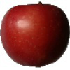

In [26]:
img=image.load_img('/content/drive/MyDrive/ibm/Data set/APPLES/100_100.jpg',target_size=(70,70))
img

In [27]:
x= image.img_to_array(img)

In [28]:
x = np.expand_dims(x, axis=0)

In [29]:
index=['APPLES', 'BANANA', 'ORANGE', 'PINEAPPLE', 'WATERMELON']
result=str(index[0])
result

'APPLES'